# Import Neccessary Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Csv File

In [5]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\75 Day\EDA-DAY13\World Population Datasets  - World Population 2023 by Country.csv',encoding='unicode_escape')

# Information About Data

In [6]:
df.head()

,"Country, territory or other area","Population (estimated mid-year value, millions)",Region,ID,source: https://www.un-ilibrary.org/content/books/9789210027137/read\nSee the visualization on Information is Beautiful\nhttps://informationisbeautiful.net/visualizations/world-population/
0,Afghanistan,42.2,Central Asia,1,NaN
1,Albania,2.8,Europe,2,NaN
2,Algeria,45.6,Africa,3,NaN
3,Angola,36.7,Africa,4,NaN
4,Antigua & Barbuda,0.1,Central & N. America,5,NaN


In [11]:
column_to_drop = "source: https://www.un-ilibrary.org/content/books/9789210027137/read\nSee the visualization on Information is Beautiful\nhttps://informationisbeautiful.net/visualizations/world-population/"
df = df.drop(column_to_drop, axis=1)

In [12]:
df.shape

(204, 4)

In [13]:
df.columns

Index(['Country, territory or other area ',
       'Population (estimated mid-year value, millions)', 'Region', 'ID'],
      dtype='object')

In [14]:
df.describe()

,ID
count,204.000000
mean,102.500000
std,59.033889
min,1.000000
25%,51.750000
50%,102.500000
75%,153.250000
max,204.000000


# Easy Columns Name

In [18]:
new_column_names = {
    'Country, territory or other area ': 'Country',
    'Population (estimated mid-year value, millions)': 'Population (millions)',
    'Region': 'Region',
    'ID': 'ID'
}
df = df.rename(columns=new_column_names)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                204 non-null    object
 1   Population (millions)  204 non-null    object
 2   Region                 204 non-null    object
 3   ID                     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


# Change data type

In [21]:
df[['Country','Population (millions)','Region']]=df[['Country','Population (millions)','Region']].astype('category')

# Check Unique Values of Columns

In [22]:
df['Country'].unique()

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua & Barbuda', ..., 'Vietnam', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']
Length: 204
Categories (204, object): ['Afghanistan', 'African Republic', 'Albania', 'Algeria', ..., 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']

In [23]:
df['Region'].unique()

['Central Asia', 'Europe', 'Africa', 'Central & N. America', 'S. America', 'Oceania', 'Middle East', 'East Asia']
Categories (8, object): ['Africa', 'Central & N. America', 'Central Asia', 'East Asia', 'Europe', 'Middle East', 'Oceania', 'S. America']

# Data Visualization

## Bar Chart for Population by Country:

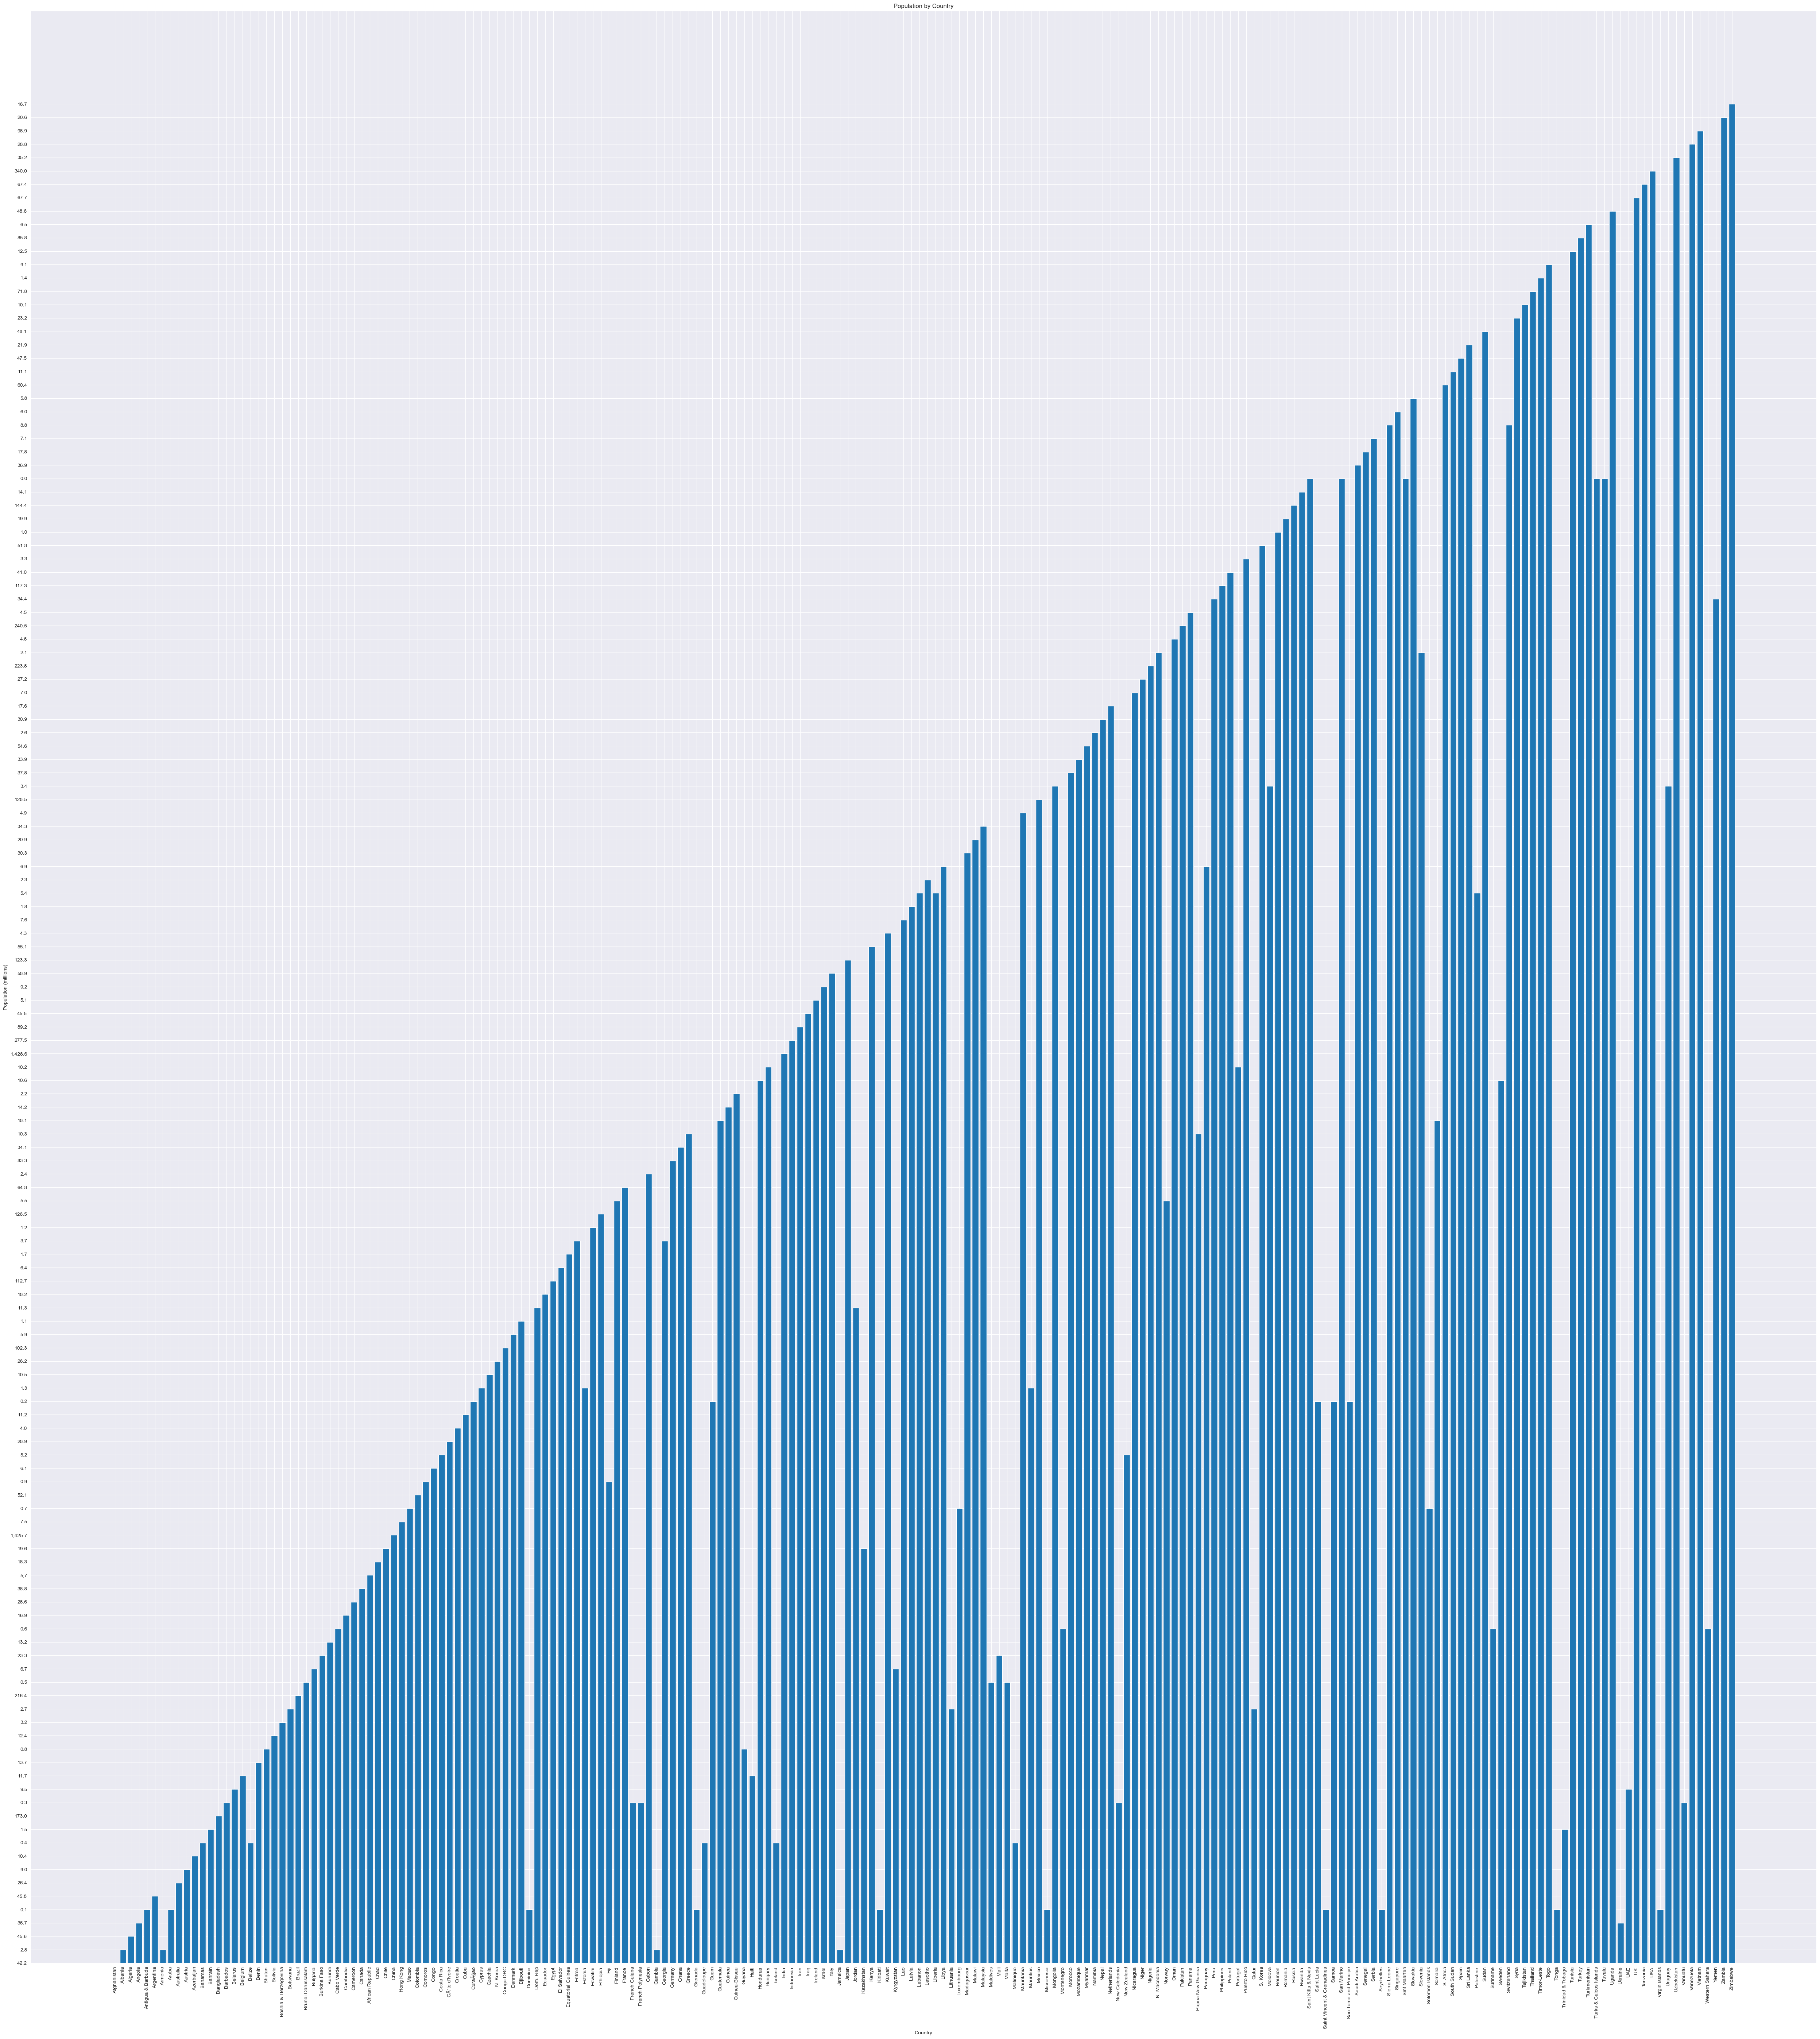

In [51]:
plt.figure(figsize=(50, 56))
plt.bar(df['Country'], df['Population (millions)'])
plt.xlabel('Country')
plt.ylabel('Population (millions)')
plt.title('Population by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

## Box Plot for Population Distribution

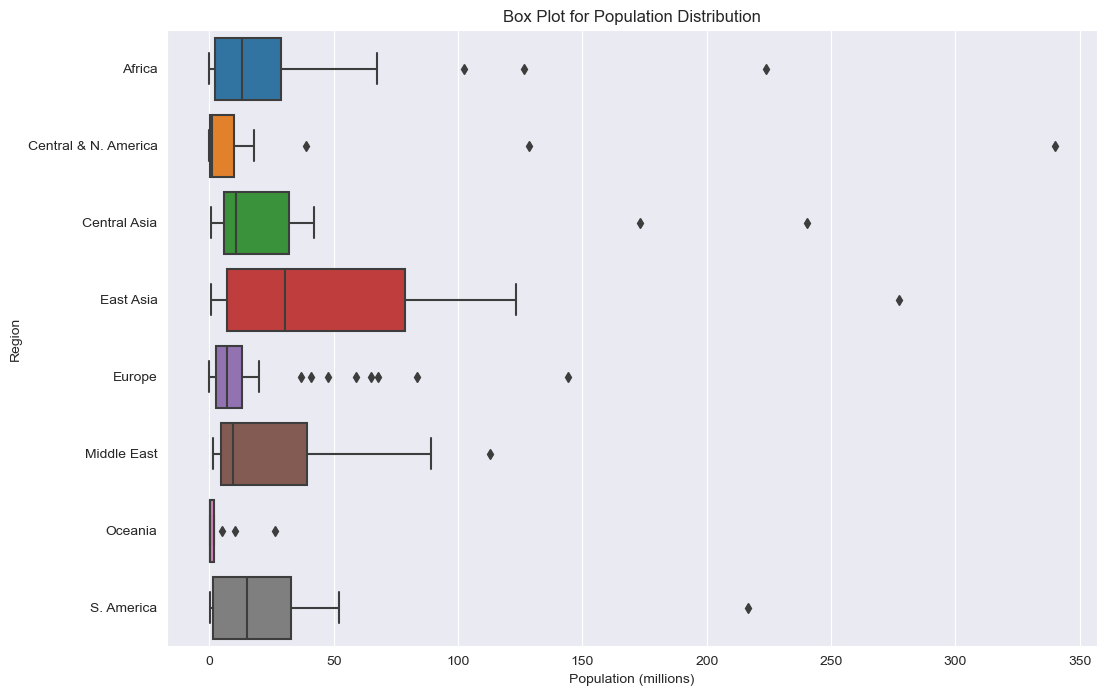

In [53]:
# Convert 'Population (millions)' to numeric (float)
df['Population (millions)'] = pd.to_numeric(df['Population (millions)'], errors='coerce')

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Population (millions)', data=df, y='Region')
plt.xlabel('Population (millions)')
plt.ylabel('Region')
plt.title('Box Plot for Population Distribution')
plt.show()

## Region-wise Population Distribution

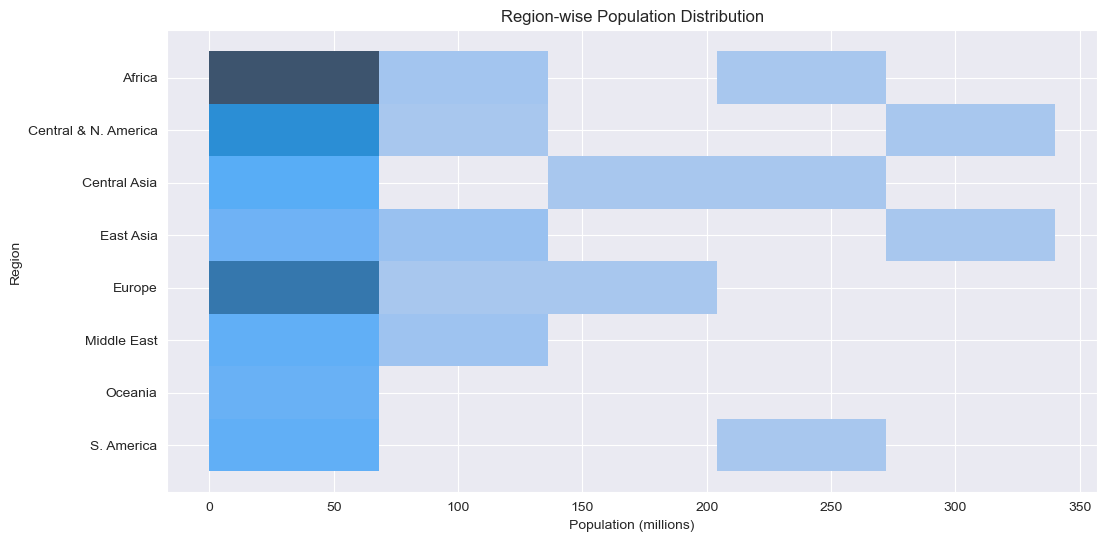

In [56]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, y='Region', x='Population (millions)', bins=5)
plt.title("Region-wise Population Distribution")
plt.xlabel("Population (millions)")
plt.ylabel("Region")
plt.show()

## Scatter Plot for Population vs. ID

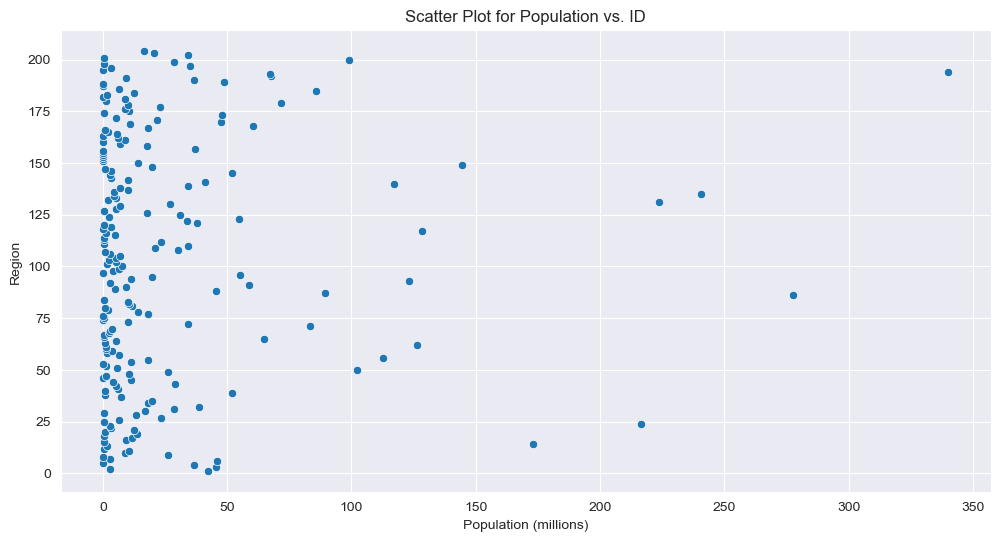

In [59]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, y='ID', x='Population (millions)')
plt.title("Scatter Plot for Population vs. ID")
plt.xlabel("Population (millions)")
plt.ylabel("Region")
plt.show()

## Region-wise Comparison of Populations

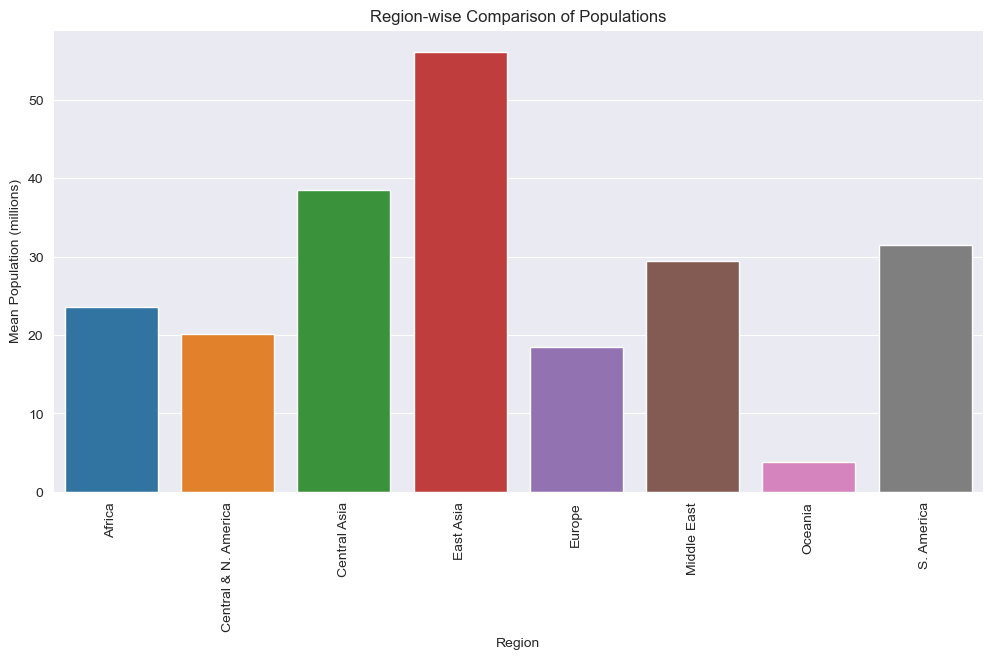

In [63]:
# Calculate the mean population for each region
mean_population_by_region = df.groupby('Region')['Population (millions)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=mean_population_by_region, x='Region', y='Population (millions)')
plt.title('Region-wise Comparison of Populations')
plt.xlabel('Region')
plt.ylabel('Mean Population (millions)')
plt.xticks(rotation=90)
plt.show()

## Distribution of Countries by Region

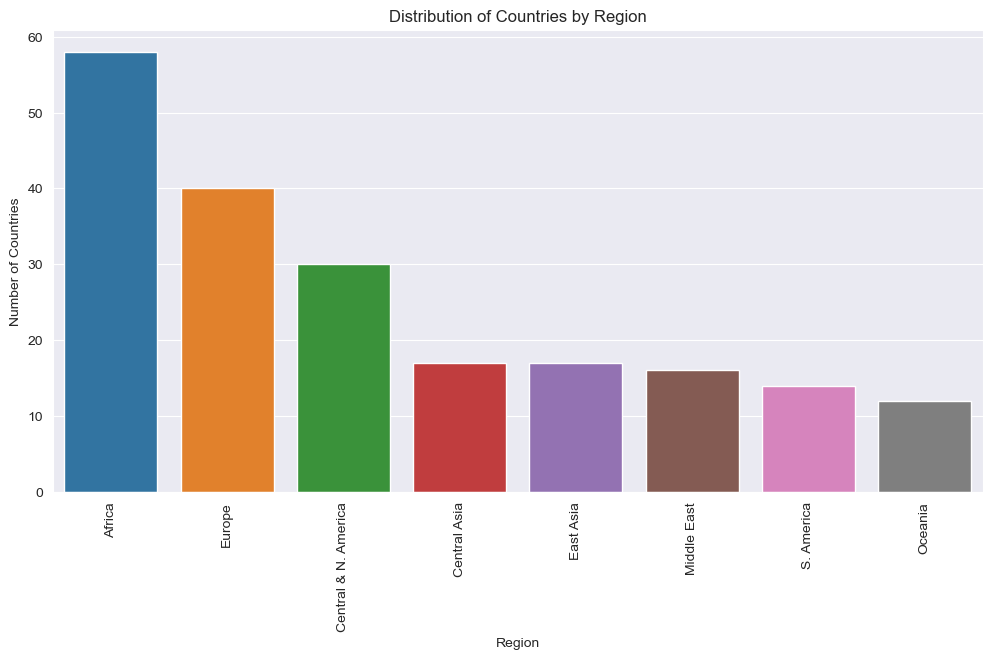

In [65]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Distribution of Countries by Region')
plt.xlabel('Region')
plt.ylabel('Number of Countries')
plt.xticks(rotation=90)
plt.show()